# Question1


In [1]:

a=2
b=2

print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a//b)
print(a**b)

4
0
4
1.0
1
4



# Question 2

In [2]:


a=2443
b=35

print(a and b)
print(a or b)
print(not b)



35
2443
False




# Question 3


In [3]:

name ='shaurya'
last_name = 'singhal'
print(name)
print(last_name)
print(f'My name is {name} {last_name}')
print('My name is %s %s'%(name,last_name))
print('My name is {0} {1}'.format(name,last_name))
print('My name is {x} {y}'.format(x=name,y=last_name))

shaurya
singhal
My name is shaurya singhal
My name is shaurya singhal
My name is shaurya singhal
My name is shaurya singhal



# Question 4


In [4]:

import numpy as np


np.zeros((3,5))

np.random.random((3,5)) +  np.random.randint(1,25,(3,5)) # with in the range[1,25]-> random generates b/w 0 and 1

np.diag([10,20,30,40])

array([[10,  0,  0,  0],
       [ 0, 20,  0,  0],
       [ 0,  0, 30,  0],
       [ 0,  0,  0, 40]])



# Question 12


In [5]:
%matplotlib inline


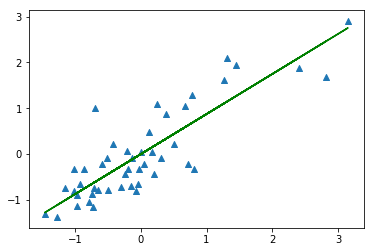

In [6]:
# method 1 using formula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('housing_price.txt',delimiter =',')
df.columns =['size','garbage','price']
df = df[['size','price']]
x = (df['size'] - np.mean(df['size']))/np.std(df['size'])
y = (df['price'] - np.mean(df['price']))/np.std(df['price'])
plt.scatter(x,y,marker = '^')

theta1 = np.cov(x,y)[0,1] / np.var(x)
theta0 = np.mean(y) - (theta1*np.mean(x))
plt.plot(x,theta0+theta1*x,'g')




In [7]:
theta0,theta1

(-9.0957272166325668e-17, 0.87357427967982382)

In [8]:
# method 2 using gradient descent
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def gradient(X,Y,theta):
    
    grad = np.zeros(2)
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

def gradientDescent(X,Y,learning_rate=0.01):
    
    theta = np.array([0,0],dtype='float')
    
    itr = 0
    max_itr = 150
    
    theta_list = []
    
    while(itr<= max_itr):
        grad = gradient(X,Y,theta)
        theta_list.append((theta[0],theta[1]))
#         print('asdg',itr, grad[1])
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
    
    return theta,theta_list

In [9]:
df = pd.read_csv('housing_price.txt',delimiter =',')
df.columns =['size','garbage','price']
df = df[['size','price']]
x = (df['size'] - np.mean(df['size']))/np.std(df['size'])
y = (df['price'] - np.mean(df['price']))/np.std(df['price'])

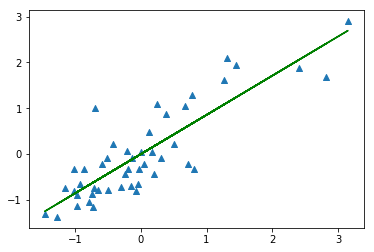

In [10]:
plt.scatter(x,y,marker = '^')
min_thetas, theta_list = gradientDescent(x,y)
plt.plot(x,hypothesis(x,min_thetas),'g')
plt.show()


In [11]:
min_thetas

array([ -1.18516308e-16,   8.54987593e-01])

In [12]:
-1.18516308e-16

-1.18516308e-16

In [13]:
y.shape

(47,)

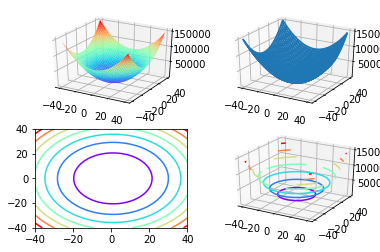

In [14]:
# Visualizing Gradient descent
df = pd.read_csv('housing_price.txt',delimiter =',')
df.columns =['size','garbage','price']
df = df[['size','price']]
x = (df['size'] - np.mean(df['size']))/np.std(df['size'])
y = (df['price'] - np.mean(df['price']))/np.std(df['price'])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

T1 = np.linspace(-40,40,y.shape[0])
T0 = np.linspace(-40,40,y.shape[0])
J=[[0 for i in range(y.shape[0])]for j in range(y.shape[0])]
for i in range(T0.shape[0]):
    for j in range(T1.shape[0]):
        J[i][j] = np.sum((T0[i] + T1[j]*x - y)**2)
J = np.array(J)
        
T0,T1 = np.meshgrid(T0,T1)

ax0 = plt.subplot(221,projection='3d')
ax0.plot_surface(T0,T1,J,cmap='rainbow')

ax1 = plt.subplot(222,projection='3d')
ax1.plot_wireframe(T0,T1,J,cmap='rainbow')


ax2 = plt.subplot(224,projection='3d')
ax2.contour(T0,T1,J,cmap='rainbow')


ax3 = plt.subplot(223)
ax3.contour(T0,T1,J,cmap='rainbow')
